Diâmetro otimizado: 29.050222325274753
Pressão máxima correspondente: 1.2057971007205706
Temperatura mínima correspondente: 293.06423094633965


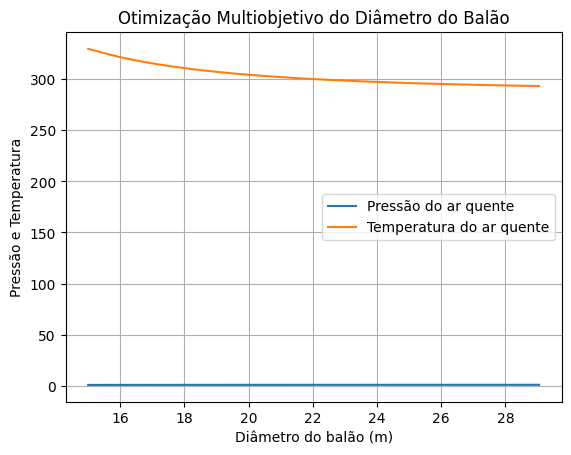

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def formula_fox(diametro, carga, temp, gravidade, pressao_atmosferica, pessoas):
    nova_carga = adicionar_pessoas(pessoas, carga)
    pressao_arquente = pressao_atmosferica - ((6*nova_carga)/(gravidade*np.pi*(diametro**3)))
    temp_arquente = ((temp*pressao_atmosferica)/pressao_arquente)
    return pressao_arquente, temp_arquente

def quilograma_para_newton(peso):
    newton = peso/0.10197
    return newton

def adicionar_pessoas(pessoas_newton, carga):
    nova_pessoas_newton = quilograma_para_newton(69) * pessoas_newton
    nova_carga = nova_pessoas_newton + carga
    return nova_carga

# Função para calcular o gradiente da pressão do ar quente em relação ao diâmetro
def gradiente_pressao(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas):
    h = 1e-5  # Passo de diferenciação
    grad = (formula_fox(diametro + h, carga, temperatura, gravidade, pressao_atmosferica, pessoas)[0] - formula_fox(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas)[0]) / h
    return grad

# Função para calcular o gradiente da temperatura do ar quente em relação ao diâmetro
def gradiente_temperatura(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas):
    h = 1e-5  # Passo de diferenciação
    grad = (formula_fox(diametro + h, carga, temperatura, gravidade, pressao_atmosferica, pessoas)[1] - formula_fox(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas)[1]) / h
    return grad

def otimizar_diametro(carga, temperatura, gravidade, pressao_atmosferica, pessoas, learning_rate=0.1, num_iteracoes=100, diametro_inicial=15):
    diametro = diametro_inicial
    historico_diametro = [diametro]
    historico_pressao_arquente = [formula_fox(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas)[0]]
    historico_temperatura_arquente = [formula_fox(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas)[1]]

    for i in range(num_iteracoes):
        grad_pressao_arquente = gradiente_pressao(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas)
        grad_temperatura_arquente = gradiente_temperatura(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas)
        # Atualização do diâmetro
        diametro += learning_rate * grad_pressao_arquente - learning_rate * grad_temperatura_arquente  # Combinação dos gradientes
        # Atualização dos históricos
        pressao_arquente = formula_fox(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas)[0]
        temp_arquente = formula_fox(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas)[1]
        historico_diametro.append(diametro)
        historico_pressao_arquente.append(pressao_arquente)
        historico_temperatura_arquente.append(temp_arquente)

    return diametro, historico_diametro, historico_pressao_arquente, historico_temperatura_arquente

# Parâmetros iniciais
carga = 2670
temperatura = 288
gravidade = 9.81 
pressao_atmosferica = 1.227
pessoas = 0  # Número de pessoas

# Otimização do diâmetro
diametro_otimizado, hist_diametro, hist_pressao, hist_temperatura = otimizar_diametro(carga, temperatura, gravidade, pressao_atmosferica, pessoas)

# Resultados
print("Diâmetro otimizado:", diametro_otimizado)
print("Pressão máxima correspondente:", hist_pressao[-1])
print("Temperatura mínima correspondente:", hist_temperatura[-1])

# Plotagem para visualização
plt.plot(hist_diametro, hist_pressao, label='Pressão do ar quente')
plt.plot(hist_diametro, hist_temperatura, label='Temperatura do ar quente')
plt.xlabel('Diâmetro do balão (m)')
plt.ylabel('Pressão e Temperatura')
plt.title('Otimização Multiobjetivo do Diâmetro do Balão')
plt.legend()
plt.grid(True)
plt.show()
